# Setup

hoop
0. OR_wx[active_slice]      1. OR_wy[active_slice]      2. OR_wz[active_slice]

tibia
3. IT_wx[active_slice]      4. IT_wy[active_slice]      5. IT_wz[active_slice]

cuneiform
6. IL_wx[active_slice]      7. IL_wy[active_slice]      8. IL_wz[active_slice]

femur
9. IB_wx[active_slice]      10. IB_wy[active_slice]     11. IB_wz[active_slice]

## Packages

In [1]:
import sys
import os

# 1. Get the directory of the current notebook/script.
# If running a notebook in the same directory as network_computation.py, 
# os.getcwd() will point to the correct Parent Directory.
current_dir = os.getcwd() 

# You can also use the hardcoded parent path for absolute certainty:
# current_dir = '/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/network-methods-code/2024-code-ExploringLocalizationInNonlinearOscillators/'

# 2. Add this directory to the Python path if it's not already there.
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"Added the project directory to sys.path: {current_dir}")

# Now, subsequent imports should succeed:
# from network_computation import compute_functional_network
# from utils.utils import common_elements

Added the project directory to sys.path: /Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/network-methods-code/2024-code-ExploringLocalizationInNonlinearOscillators


In [2]:
import pickle
from pathlib import Path
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
import compute_in_degrees
import numpy as np
import seaborn as sns
from network_computation import compute_functional_network, compute_functional_network_th, align_phase, align_multiple_series
from utils.utils import common_elements
from matplotlib.animation import FuncAnimation, PillowWriter
import os # For saving the GIF
from pyunicorn.timeseries.inter_system_recurrence_network import InterSystemRecurrenceNetwork
from process_movella import load_movella
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Data

In [3]:
# Defining input and output directory

IN_DIR = Path("/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/experiments/Hula Hoop/2025-09-03 Experiment 5/2025-09-03 Euler Angles/")
OUT_DIR = Path("out")

# make the output directory if it does not exist
if not OUT_DIR.exists():
    OUT_DIR.mkdir()

# Reading sensor data

# OR: hoop
# OL: waist
# IB: femur
# IT: tibia
# IL: cuneiform

OR_hoop_file = IN_DIR / "OR_20250903_203926.csv"
OL_hoop_file = IN_DIR / "OL_20250903_203926.csv"
IT_hoop_file = IN_DIR / "IT_20250903_203926.csv"
IL_hoop_file = IN_DIR / "IL_20250903_203926.csv"
IB_hoop_file = IN_DIR / "IB_20250903_203926.csv"

lead_time_val = 0
OL_hoop_data = load_movella(OL_hoop_file, lead_time=lead_time_val)
OR_hoop_data = load_movella(OR_hoop_file, lead_time=lead_time_val)
IT_hoop_data = load_movella(IT_hoop_file, lead_time=lead_time_val)
IL_hoop_data = load_movella(IL_hoop_file, lead_time=lead_time_val)
IB_hoop_data = load_movella(IB_hoop_file, lead_time=lead_time_val)

time, OL_ax, OL_ay, OL_az, OL_phi, OL_theta, OL_psi, OL_wx, OL_wy, OL_wz = OL_hoop_data.T
_, OR_ax, OR_ay, OR_az, OR_phi, OR_theta, OR_psi, OR_wx, OR_wy, OR_wz = OR_hoop_data.T
_, IT_ax, IT_ay, IT_az, IT_phi, IT_theta, IT_psi, IT_wx, IT_wy, IT_wz = IT_hoop_data.T
_, IL_ax, IL_ay, IL_az, IL_phi, IL_theta, IL_psi, IL_wx, IL_wy, IL_wz = IL_hoop_data.T
_, IB_ax, IB_ay, IB_az, IB_phi, IB_theta, IB_psi, IB_wx, IB_wy, IB_wz = IB_hoop_data.T

# time step
dt = time[1]-time[0]

In [4]:
# Derivatives of psi and phi of hip

OR_psi_unwrapped = np.unwrap(OR_psi)
IT_psi_unwrapped = np.unwrap(IT_psi)
IL_psi_unwrapped = np.unwrap(IL_psi)
IB_psi_unwrapped = np.unwrap(IB_psi)

OR_theta_unwrapped = np.unwrap(OR_theta)
IT_theta_unwrapped = np.unwrap(IT_theta)
IL_theta_unwrapped = np.unwrap(IL_theta)
IB_theta_unwrapped = np.unwrap(IB_theta)

OR_phi_unwrapped = np.unwrap(OR_phi)
IT_phi_unwrapped = np.unwrap(IT_phi)
IL_phi_unwrapped = np.unwrap(IL_phi)
IB_phi_unwrapped = np.unwrap(IB_phi)

OR_dpsi_dt = np.gradient(OR_psi_unwrapped, dt)
IT_dpsi_dt = np.gradient(IT_psi_unwrapped, dt)
IL_dpsi_dt = np.gradient(IL_psi_unwrapped, dt)
IB_dpsi_dt = np.gradient(IB_psi_unwrapped, dt)

OR_dtheta_dt = np.gradient(OR_theta_unwrapped, dt)
IT_dtheta_dt = np.gradient(IT_theta_unwrapped, dt)
IL_dtheta_dt = np.gradient(IL_theta_unwrapped, dt)
IB_dtheta_dt = np.gradient(IB_theta_unwrapped, dt)

OR_dphi_dt = np.gradient(OR_phi_unwrapped, dt)
IT_dphi_dt = np.gradient(IT_phi_unwrapped, dt)
IL_dphi_dt = np.gradient(IL_phi_unwrapped, dt)
IB_dphi_dt = np.gradient(IB_phi_unwrapped, dt)

sensors = ['OR', 'IT', 'IL', 'IB']
angle_types = ['dpsi_dt', 'dtheta_dt', 'dphi_dt']
subplot_titles = [f'{s}_{a}' for a in angle_types for s in sensors]

fig_dhip = make_subplots(
    rows=12, 
    cols=1, 
    subplot_titles=subplot_titles
)

data_dict = {
    'OR': {'dpsi_dt': OR_dpsi_dt, 'dtheta_dt': OR_dtheta_dt, 'dphi_dt': OR_dphi_dt},
    'IT': {'dpsi_dt': IT_dpsi_dt, 'dtheta_dt': IT_dtheta_dt, 'dphi_dt': IT_dphi_dt},
    'IL': {'dpsi_dt': IL_dpsi_dt, 'dtheta_dt': IL_dtheta_dt, 'dphi_dt': IL_dphi_dt},
    'IB': {'dpsi_dt': IB_dpsi_dt, 'dtheta_dt': IB_dtheta_dt, 'dphi_dt': IB_dphi_dt},
}

derivative_colors = {
    'dpsi_dt': 'rgba(0, 0, 255, 0.7)',
    'dtheta_dt': 'rgba(255, 0, 0, 0.7)',
    'dphi_dt': 'rgba(0, 128, 0, 0.7)'
}

legend_shown = {angle: False for angle in angle_types}

i = 1
for angle_type in angle_types:
    for sensor in sensors:
        fig_dhip.add_trace(go.Scatter(
            x=time, # x=time[active_slice],
            y=data_dict[sensor][angle_type], # y=data_dict[sensor][angle_type][active_slice],
            mode='lines',
            name=f'{angle_type}',
            legendgroup=f'{angle_type}',
            line=dict(color=derivative_colors[angle_type]),
            showlegend=not legend_shown[angle_type]
        ), row=i, col=1)
        
        legend_shown[angle_type] = True
        i += 1

fig_dhip.update_layout(
    height=1200,
    width=800,
    title_text="Derivative of Euler Angles",
    margin=dict(l=40, r=20, t=80, b=40),
)

fig_dhip.show()

In [5]:
data_angles = np.vstack([OR_phi, OR_theta, OR_psi, IT_phi, IT_theta, IT_psi, IL_phi, IL_theta, IL_psi, IB_phi, IB_theta, IB_psi]).T
print(np.shape(data_angles))

OR_dpsi_dt

data_angle_derivatives = np.vstack([OR_dphi_dt, OR_dtheta_dt, OR_dpsi_dt, IT_dphi_dt, IT_dtheta_dt, IT_dpsi_dt, IL_dphi_dt, IL_dtheta_dt, IL_dpsi_dt, IB_dphi_dt, IB_dtheta_dt, IB_dpsi_dt]).T

(2853, 12)


In [6]:
t_arr = np.arange(0,dt*2853,dt)
print(np.shape(t_arr))

(2853,)


In [7]:
def get_sandwich(t_arr, data_arr):
    '''Sandwich: Append t before every time series'''

    N, M = data_arr.shape

    # create an empty array with space for M columns + M time columns
    data_sandwiched = np.zeros((N, 2*M))

    # fill even columns (0,2,4,...) with time array
    data_sandwiched[:, 0::2] = t_arr[:, None]

    # fill odd columns (1,3,5,...) with original data columns
    data_sandwiched[:, 1::2] = data_arr


    return data_sandwiched

In [8]:
data2 = get_sandwich(t_arr, data_angle_derivatives)

In [9]:
np.max(np.abs(data2), axis=0, keepdims=True)

array([[23.765716  ,  3.76421185, 23.765716  ,  2.6253094 , 23.765716  ,
        12.20055681, 23.765716  , 91.79178499, 23.765716  ,  4.4007994 ,
        23.765716  , 93.1784792 , 23.765716  ,  8.15739896, 23.765716  ,
         5.01151596, 23.765716  ,  8.19027501, 23.765716  , 13.46398234,
        23.765716  ,  1.99610843, 23.765716  , 17.1252316 ]])

In [10]:
np.shape(data2)

(2853, 24)

In [11]:
data3 = data2[694:2588, :]
np.shape(data3)

(1894, 24)

# Sliding Time Window - Angle

In [21]:
# --- GLOBAL PLOTTING CONFIGURATION (Variables used by both functions) ---

network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_phi", 1: "h_theta", 2: "h_psi", 3: "t_phi", 4: "t_theta", 5: "t_psi", 
    6: "c_phi", 7: "c_theta", 8: "c_psi", 9: "f_phi", 10: "f_theta", 11: "f_psi"
}
target_nodes = ["h_phi", "h_theta", "h_psi"]
width_scale = 5.0 


def draw_single_network(ax, network_data, title, pos, t_start, WINDOW_SIZE):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)


def update_angles(frame_index, data2, WINDOW_SIZE, N_NODES, start_indices, 
           axes_flat, network_titles, fixed_pos, 
           all_C_xys, all_C_yxs, all_T_xys, all_T_yxs):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    The accumulation lists (all_C_xys, etc.) are modified in place (by reference).
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data_angles[t_start:t_end, :]
    # align series such that the difference between any two is between -pi and pi
    data_window = align_multiple_series(data_window)
    # sandwich time series 
    data_window = get_sandwich(t_arr[t_start:t_end], data_window)

    # 2. Calculate the four networks
    # This assumes 'compute_functional_network' is available in the environment
    # G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, RRx, RRy, RRxy = compute_functional_network_th(data_window,th=(0.03, 0.03, 0.02), n=N_NODES )
    G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(data_window,rr=(0.03, 0.03, 0.02), n=N_NODES )
    
    
    networks_data = [C_xys, C_yxs, T_xys, T_yxs]

    # --- APPEND MATRICES TO THE ACCUMULATION LISTS (Passed by Reference) ---
    all_C_xys.append(C_xys)
    all_C_yxs.append(C_yxs)
    all_T_xys.append(T_xys)
    all_T_yxs.append(T_yxs)

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        # Pass WINDOW_SIZE to the draw function
        draw_single_network(ax, network_data, title, fixed_pos, t_start, WINDOW_SIZE)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat


def get_sliding_window_animation_angles(data_angles, WINDOW_SIZE = 20, STEP_SIZE = 5):
    '''
    get animation of sliding window saving the thickness of the network

        WINDOW_SIZE: Number of time points in the sliding window
        STEP_SIZE: How much the window shifts per frame (fewer steps = faster animation)
    '''
    
    # Number of nodes
    # Check shape compatibility
    if np.shape(data_angles)[1] % 2 != 0:
        raise ValueError("The number of columns in data2 must be even (2 * N_NODES).")
        
    N_NODES = int(np.shape(data_angles)[1])


    # --- ANIMATION PARAMETERS ---
    TOTAL_TIME_POINTS = np.shape(data_angles)[0]
    FPS = 10             # Frames per second for the final GIF

    # Calculate the start indices for each frame
    start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
    NUM_FRAMES = len(start_indices)

    if NUM_FRAMES == 0:
        print("Warning: Data is too short or window/step size is too large to generate any frames.")
        return None, None, None, None

    # Prepare the figure and axes once
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes_flat = axes.flatten()

    # Pre-calculate the fixed circular layout
    dummy_G = nx.DiGraph(np.zeros((N_NODES, N_NODES)))
    dummy_LG = nx.relabel_nodes(dummy_G, mapping)
    fixed_pos = nx.circular_layout(dummy_LG)

    # These lists will store the (N x N) matrices for each time window (frame).
    all_C_xys = []
    all_C_yxs = []
    all_T_xys = []
    all_T_yxs = []

    # --- 3. Run and Save the Animation ---

    print(f"Generating animation with {NUM_FRAMES} frames...")

    # Define the arguments (fargs) that need to be passed to the update function
    fargs_tuple = (
        data_angles, WINDOW_SIZE, N_NODES, start_indices, 
        axes_flat, network_titles, fixed_pos, 
        all_C_xys, all_C_yxs, all_T_xys, all_T_yxs # <-- The lists are included here!
    )
    
    anim = FuncAnimation(
        fig, 
        update_angles, 
        frames=NUM_FRAMES,
        fargs=fargs_tuple, # <-- Pass the contextual arguments and the lists
        blit=False,  
        interval=1000/FPS 
    )
        
    # Set save path
    animation_filename = 'network_evolution.mp4'

    # Create writer
    writer = FFMpegWriter(fps=FPS)

    # Save animation as MP4
    anim.save(animation_filename, writer=writer)

    plt.close(fig) # Close the figure to free up memory
    print(f"Animation saved as {animation_filename}")

    # --- CONVERT LISTS TO NUMPY ARRAYS AND SAVE ---
    # The lists are now filled because the update function modified them in place.

    # Convert the lists of matrices into 3D NumPy arrays (Frames x Nodes x Nodes)
    C_xys_3D = np.array(all_C_xys)
    C_yxs_3D = np.array(all_C_yxs)
    T_xys_3D = np.array(all_T_xys)
    T_yxs_3D = np.array(all_T_yxs)

    # Save the 3D arrays to disk
    np.save('C_xys_matrices.npy', C_xys_3D)
    np.save('C_yxs_matrices.npy', C_yxs_3D)
    np.save('T_xys_matrices.npy', T_xys_3D)
    np.save('T_yxs_matrices.npy', T_yxs_3D)

    print("\n--- Matrix Data Saved ---")
    print(f"Shape of saved matrices ({NUM_FRAMES} frames x {N_NODES} nodes x {N_NODES} nodes): ({C_xys_3D.shape})")
    print(f"Matrices saved as:\n  - C_xys_matrices.npy\n  - C_yxs_matrices.npy\n  - T_xys_matrices.npy\n  - T_yxs_matrices.npy")

    return C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D

In [22]:
# data_window = data_angles
# print(np.shape(data_window))
# # align series such that the difference between any two is between -pi and pi
# data_window = align_multiple_series(data_window)
# print(np.shape(data_window))
# # sandwich time series 
# data_window = get_sandwich(t_arr, data_window)
# print(np.shape(data_window))

In [23]:
C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D = get_sliding_window_animation_angles(data_angles, WINDOW_SIZE = 60, STEP_SIZE = 60)

Generating animation with 47 frames...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurr

In [17]:
np.shape(C_xys_3D)

(48, 6, 6)

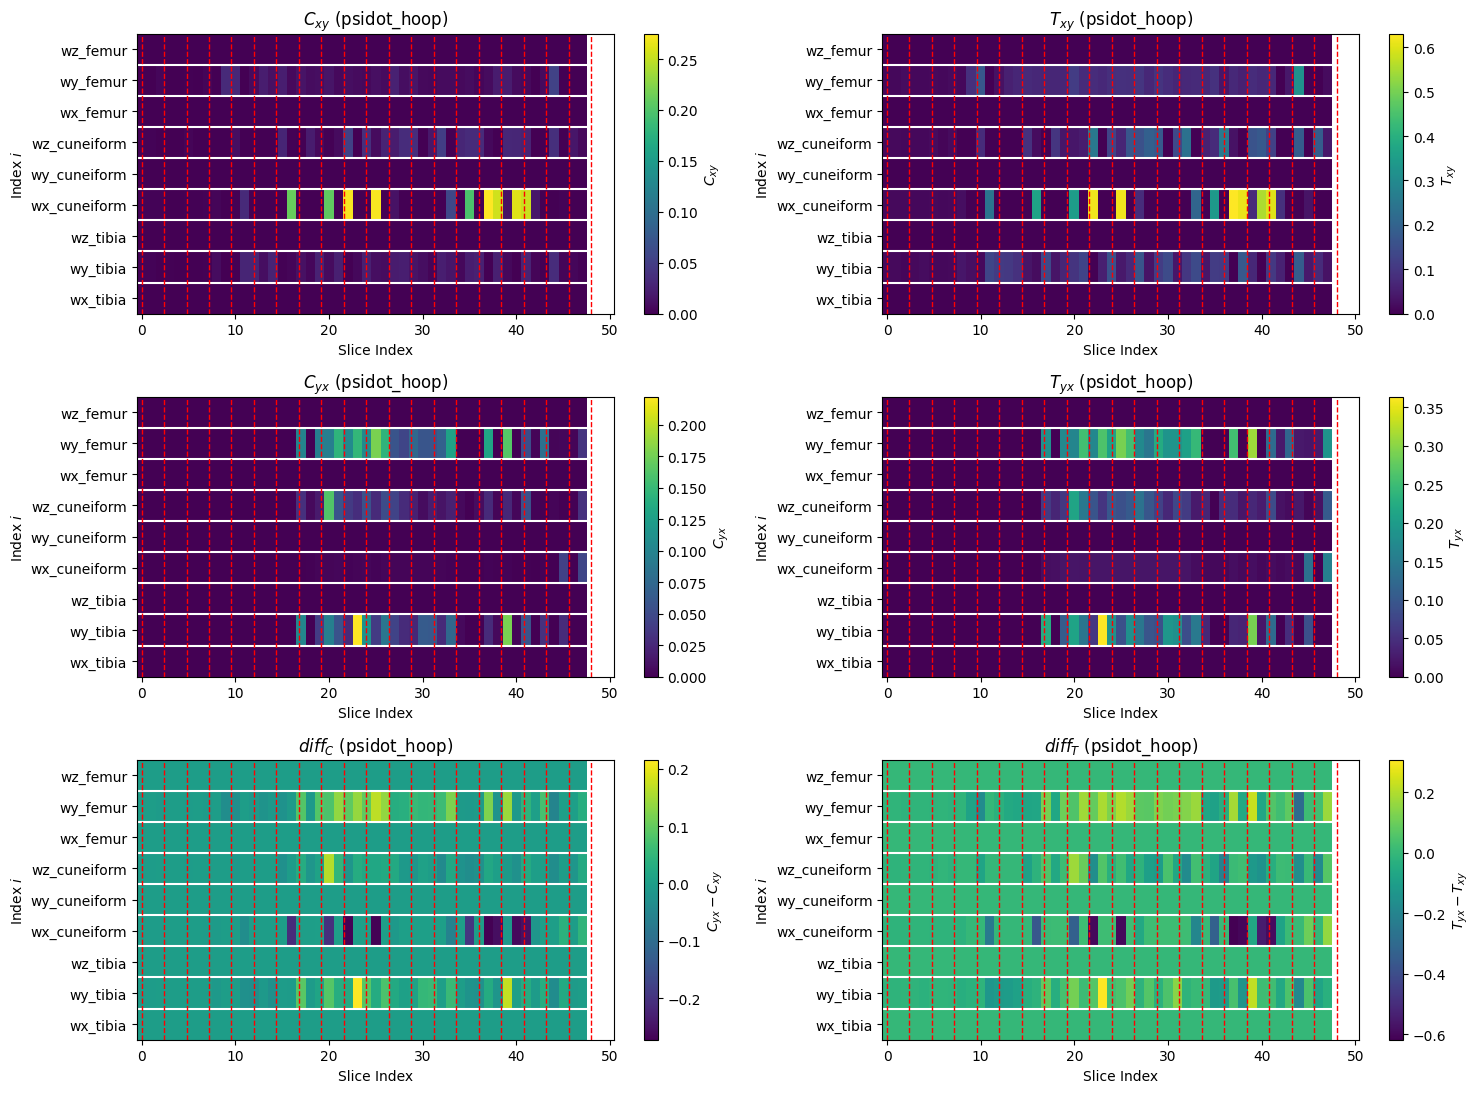

In [24]:
# --- Relabeling Logic for Index i (2 to 10) ---
i_start = 2
i_end = 11  # Up to (but not including) 11, so indices are 2, 3, ..., 10
i_values = np.array(['wx_tibia', 'wy_tibia', 'wz_tibia', 'wx_cuneiform', 'wy_cuneiform', 'wz_cuneiform', 'wx_femur', 'wy_femur', 'wz_femur']) #np.arange(i_start, i_end)
i_labels = [str(i) for i in i_values]

# Data extraction (slicing the third dimension from index 2 up to 11)
data_C0 = C_xys_3D[:, 2, i_start:i_end]
data_T0 = T_xys_3D[:, 2, i_start:i_end]
data_C2 = C_yxs_3D[:, 2, i_start:i_end]
data_T2 = T_yxs_3D[:, 2, i_start:i_end]
data_C4 = C_yxs_3D[:, 2, i_start:i_end]-C_xys_3D[:, 2, i_start:i_end]
data_T4 = T_yxs_3D[:, 2, i_start:i_end]-T_xys_3D[:, 2, i_start:i_end]

# List of all data arrays, their titles, and labels for plotting
heatmap_info = [
    (data_C0, '$C_{xy}$ (psidot_hoop)', '$C_{xy}$'),
    (data_T0, '$T_{xy}$ (psidot_hoop)', '$T_{xy}$'),
    (data_C2, '$C_{yx}$ (psidot_hoop)', '$C_{yx}$'),
    (data_T2, '$T_{yx}$ (psidot_hoop)', '$T_{yx}$'),
    (data_C4, '$diff_C$ (psidot_hoop)', '$C_{yx}-C_{xy}$'),
    (data_T4, '$diff_T$ (psidot_hoop)', '$T_{yx}-T_{xy}$'),
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

x_label = 'Slice Index'
y_label = 'Index $i$'
# super_title = f'Heatmaps for Timewindow = {nframes} frames'

# fig.suptitle(super_title, fontsize=16)

for idx, (data_angle_derivatives, base_title, cbar_label) in enumerate(heatmap_info):
    ax = axes[idx]

    # Transpose the data (data.T) so 'Slice' is on X-axis and 'i' is on Y-axis.
    # origin='lower' ensures i=2 is at the bottom and i=10 is at the top.
    im = ax.imshow(data_angle_derivatives.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none') 

    # --- Setting the Y-axis ticks/labels (Index i: 2-10) ---
    # The tick locations are 0 to 8, corresponding to the 9 indices in i_values.
    ax.set_yticks(np.arange(len(i_values)))
    ax.set_yticklabels(i_labels)
    # --------------------------------------------------------

    # --- ADDING SEPARATION LINES BETWEEN ROWS ---
    # Lines are drawn at k + 0.5, which falls between cell k and cell k+1.
    for k in range(len(i_values) - 1):
        ax.axhline(y=k + 0.5, color='white', linewidth=1.5)
    # --------------------------------------------

    intervals = np.linspace(0,np.size(data_C0)/9,21)

    for x in intervals:
        ax.axvline(x=x, color='red', linestyle='--', linewidth=1)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(base_title)

    # Add a colorbar
    plt.colorbar(im, ax=ax, label=cbar_label)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

# To save the figure, uncomment the line below:
# plt.savefig('combined_heatmaps_with_separation.png')
# plt.show()

# Sliding Time Window - Angle derivatives

In [19]:
# --- GLOBAL PLOTTING CONFIGURATION (Variables used by both functions) ---

network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_phi", 1: "h_theta", 2: "h_psi", 3: "t_phi", 4: "t_theta", 5: "t_psi", 
    6: "c_phi", 7: "c_theta", 8: "c_psi", 9: "f_phi", 10: "f_theta", 11: "f_psi"
}
target_nodes = ["h_phi", "h_theta", "h_psi"]
width_scale = 5.0 


def draw_single_network(ax, network_data, title, pos, t_start, WINDOW_SIZE):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)


def update(frame_index, data2, WINDOW_SIZE, N_NODES, start_indices, 
           axes_flat, network_titles, fixed_pos, 
           all_C_xys, all_C_yxs, all_T_xys, all_T_yxs):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    The accumulation lists (all_C_xys, etc.) are modified in place (by reference).
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data2[t_start:t_end, :]

    # 2. Calculate the four networks
    # This assumes 'compute_functional_network' is available in the environment
    # G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, RRx, RRy, RRxy = compute_functional_network_th(data_window,th=(0.03, 0.03, 0.02), n=N_NODES )
    G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(data_window,rr=(0.03, 0.03, 0.02), n=N_NODES )
    
    
    networks_data = [C_xys, C_yxs, T_xys, T_yxs]

    # --- APPEND MATRICES TO THE ACCUMULATION LISTS (Passed by Reference) ---
    all_C_xys.append(C_xys)
    all_C_yxs.append(C_yxs)
    all_T_xys.append(T_xys)
    all_T_yxs.append(T_yxs)

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        # Pass WINDOW_SIZE to the draw function
        draw_single_network(ax, network_data, title, fixed_pos, t_start, WINDOW_SIZE)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat


def get_sliding_window_animation(data2, WINDOW_SIZE = 20, STEP_SIZE = 5):
    '''
    get animation of sliding window saving the thickness of the network

        WINDOW_SIZE: Number of time points in the sliding window
        STEP_SIZE: How much the window shifts per frame (fewer steps = faster animation)
    '''
    
    # Number of nodes
    # Check shape compatibility
    if np.shape(data2)[1] % 2 != 0:
        raise ValueError("The number of columns in data2 must be even (2 * N_NODES).")
        
    N_NODES = int(np.shape(data2)[1]/2)


    # --- ANIMATION PARAMETERS ---
    TOTAL_TIME_POINTS = np.shape(data2)[0]
    FPS = 10             # Frames per second for the final GIF

    # Calculate the start indices for each frame
    start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
    NUM_FRAMES = len(start_indices)

    if NUM_FRAMES == 0:
        print("Warning: Data is too short or window/step size is too large to generate any frames.")
        return None, None, None, None

    # Prepare the figure and axes once
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    axes_flat = axes.flatten()

    # Pre-calculate the fixed circular layout
    dummy_G = nx.DiGraph(np.zeros((N_NODES, N_NODES)))
    dummy_LG = nx.relabel_nodes(dummy_G, mapping)
    fixed_pos = nx.circular_layout(dummy_LG)

    # These lists will store the (N x N) matrices for each time window (frame).
    all_C_xys = []
    all_C_yxs = []
    all_T_xys = []
    all_T_yxs = []

    # --- 3. Run and Save the Animation ---

    print(f"Generating animation with {NUM_FRAMES} frames...")

    # Define the arguments (fargs) that need to be passed to the update function
    fargs_tuple = (
        data2, WINDOW_SIZE, N_NODES, start_indices, 
        axes_flat, network_titles, fixed_pos, 
        all_C_xys, all_C_yxs, all_T_xys, all_T_yxs # <-- The lists are included here!
    )
    
    anim = FuncAnimation(
        fig, 
        update, 
        frames=NUM_FRAMES,
        fargs=fargs_tuple, # <-- Pass the contextual arguments and the lists
        blit=False,  
        interval=1000/FPS 
    )
        
    # Set save path
    animation_filename = 'network_evolution.mp4'

    # Create writer
    writer = FFMpegWriter(fps=FPS)

    # Save animation as MP4
    anim.save(animation_filename, writer=writer)

    plt.close(fig) # Close the figure to free up memory
    print(f"Animation saved as {animation_filename}")

    # --- CONVERT LISTS TO NUMPY ARRAYS AND SAVE ---
    # The lists are now filled because the update function modified them in place.

    # Convert the lists of matrices into 3D NumPy arrays (Frames x Nodes x Nodes)
    C_xys_3D = np.array(all_C_xys)
    C_yxs_3D = np.array(all_C_yxs)
    T_xys_3D = np.array(all_T_xys)
    T_yxs_3D = np.array(all_T_yxs)

    # Save the 3D arrays to disk
    np.save('C_xys_matrices.npy', C_xys_3D)
    np.save('C_yxs_matrices.npy', C_yxs_3D)
    np.save('T_xys_matrices.npy', T_xys_3D)
    np.save('T_yxs_matrices.npy', T_yxs_3D)

    print("\n--- Matrix Data Saved ---")
    print(f"Shape of saved matrices ({NUM_FRAMES} frames x {N_NODES} nodes x {N_NODES} nodes): ({C_xys_3D.shape})")
    print(f"Matrices saved as:\n  - C_xys_matrices.npy\n  - C_yxs_matrices.npy\n  - T_xys_matrices.npy\n  - T_yxs_matrices.npy")

    return C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D

In [20]:
C_xys_3D, C_yxs_3D, T_xys_3D, T_yxs_3D = get_sliding_window_animation(data3, WINDOW_SIZE = 60, STEP_SIZE = 60)

Generating animation with 31 frames...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed recurrence rate...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed recurr

In [13]:
np.shape(C_xys_3D)

(22, 12, 12)

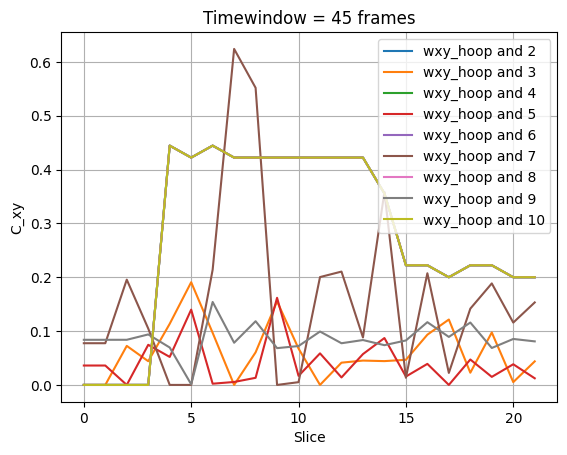

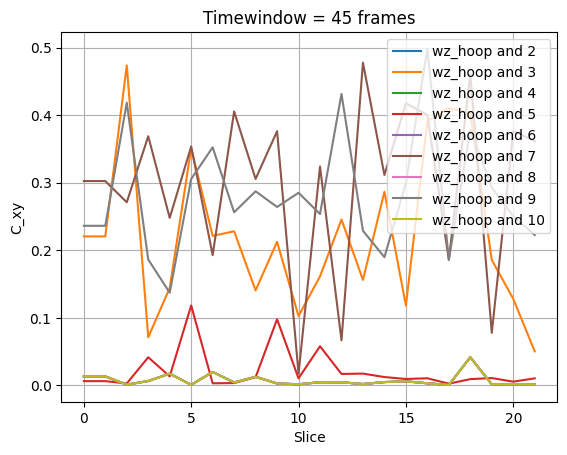

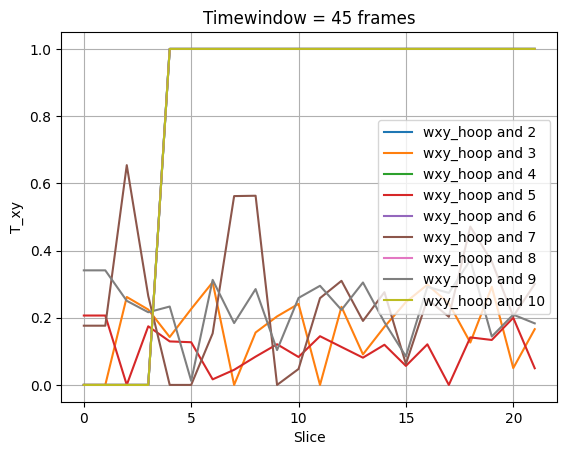

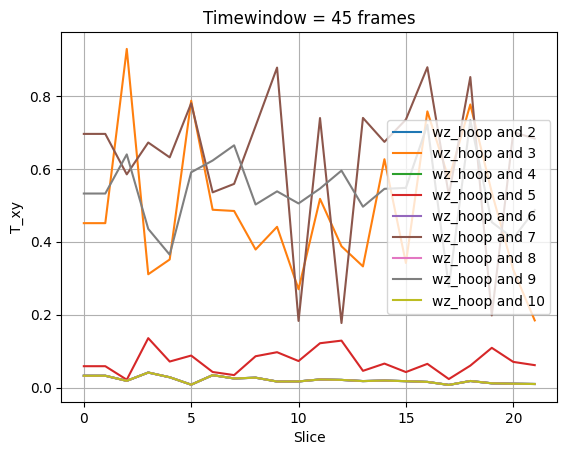

In [14]:
nframes = 45

plt.figure()
for i in range(2,11):
    plt.plot(C_xys_3D[:,0,i], label=f'wxy_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('C_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for i in range(2,11):
    plt.plot(C_xys_3D[:,1,i], label=f'wz_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('C_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

#############

plt.figure()
for i in range(2,11):
    plt.plot(T_xys_3D[:,0,i], label=f'wxy_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('T_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
for i in range(2,11):
    plt.plot(T_xys_3D[:,1,i], label=f'wz_hoop and {i}')

plt.xlabel('Slice')
plt.ylabel('T_xy')
plt.title(f'Timewindow = {nframes} frames')
plt.legend()
plt.grid(True)
plt.show()


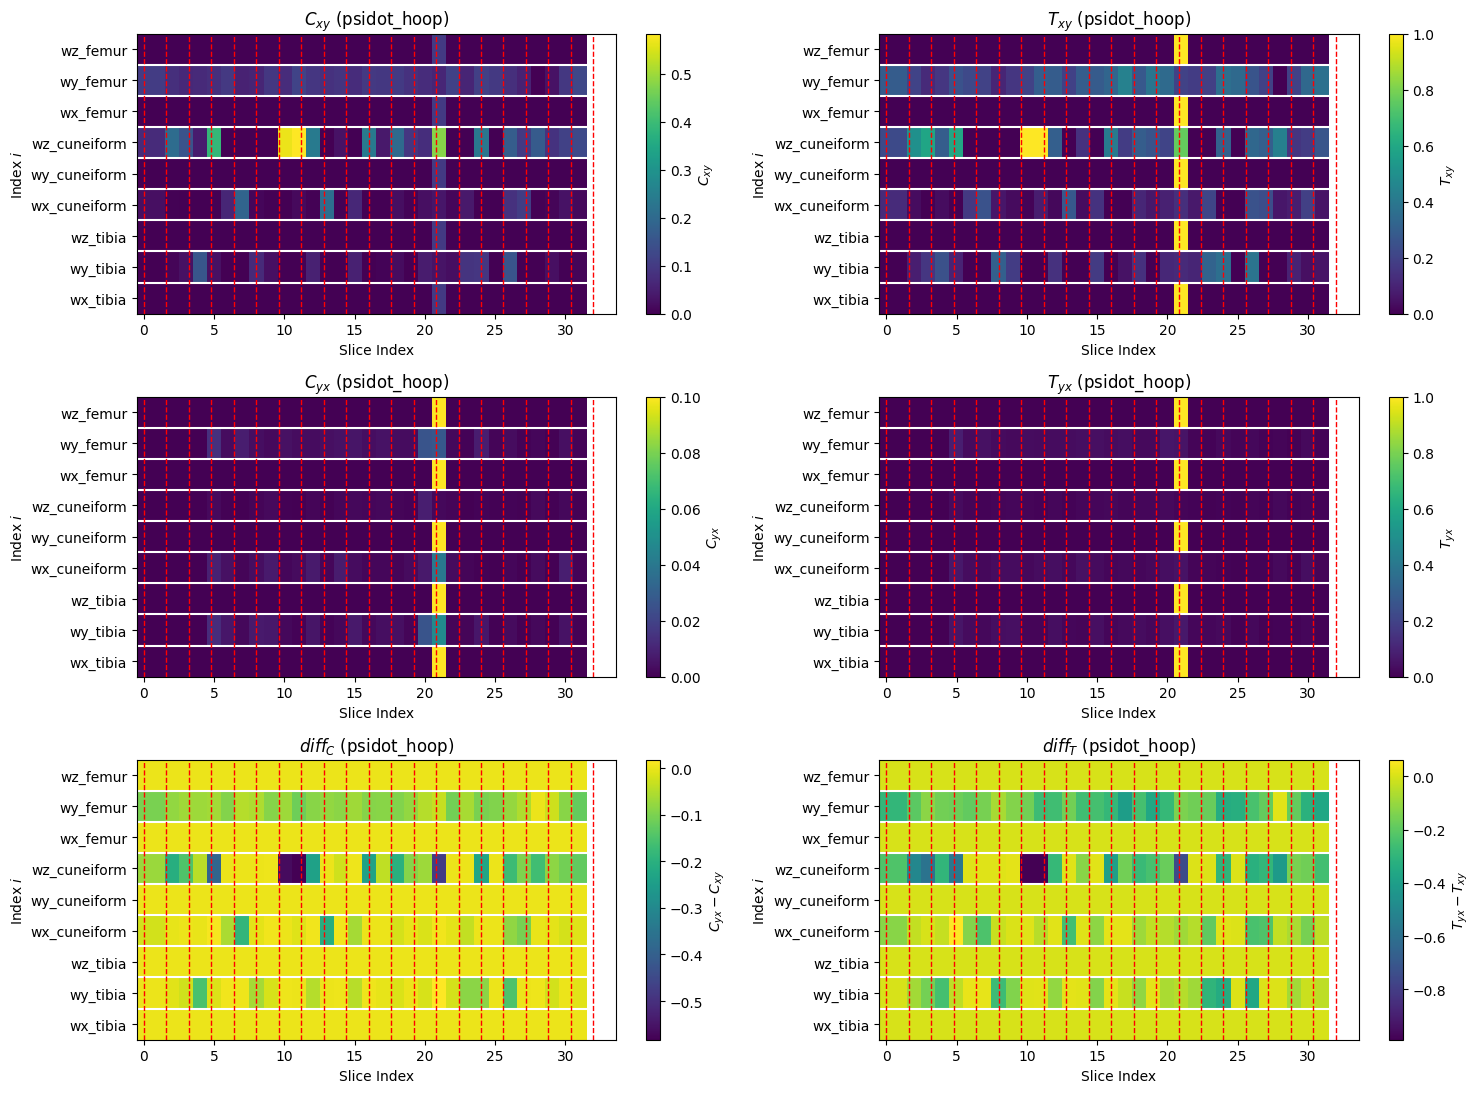

In [ ]:
# --- Relabeling Logic for Index i (2 to 10) ---
i_start = 2
i_end = 11  # Up to (but not including) 11, so indices are 2, 3, ..., 10
i_values = np.array(['wx_tibia', 'wy_tibia', 'wz_tibia', 'wx_cuneiform', 'wy_cuneiform', 'wz_cuneiform', 'wx_femur', 'wy_femur', 'wz_femur']) #np.arange(i_start, i_end)
i_labels = [str(i) for i in i_values]

# Data extraction (slicing the third dimension from index 2 up to 11)
data_C0 = C_xys_3D[:, 2, i_start:i_end]
data_T0 = T_xys_3D[:, 2, i_start:i_end]
data_C2 = C_yxs_3D[:, 2, i_start:i_end]
data_T2 = T_yxs_3D[:, 2, i_start:i_end]
data_C4 = C_yxs_3D[:, 2, i_start:i_end]-C_xys_3D[:, 2, i_start:i_end]
data_T4 = T_yxs_3D[:, 2, i_start:i_end]-T_xys_3D[:, 2, i_start:i_end]

# List of all data arrays, their titles, and labels for plotting
heatmap_info = [
    (data_C0, '$C_{xy}$ (psidot_hoop)', '$C_{xy}$'),
    (data_T0, '$T_{xy}$ (psidot_hoop)', '$T_{xy}$'),
    (data_C2, '$C_{yx}$ (psidot_hoop)', '$C_{yx}$'),
    (data_T2, '$T_{yx}$ (psidot_hoop)', '$T_{yx}$'),
    (data_C4, '$diff_C$ (psidot_hoop)', '$C_{yx}-C_{xy}$'),
    (data_T4, '$diff_T$ (psidot_hoop)', '$T_{yx}-T_{xy}$'),
]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

x_label = 'Slice Index'
y_label = 'Index $i$'
# super_title = f'Heatmaps for Timewindow = {nframes} frames'

# fig.suptitle(super_title, fontsize=16)

for idx, (data_angle_derivatives, base_title, cbar_label) in enumerate(heatmap_info):
    ax = axes[idx]

    # Transpose the data (data.T) so 'Slice' is on X-axis and 'i' is on Y-axis.
    # origin='lower' ensures i=2 is at the bottom and i=10 is at the top.
    im = ax.imshow(data_angle_derivatives.T, aspect='auto', origin='lower', cmap='viridis', interpolation='none') 

    # --- Setting the Y-axis ticks/labels (Index i: 2-10) ---
    # The tick locations are 0 to 8, corresponding to the 9 indices in i_values.
    ax.set_yticks(np.arange(len(i_values)))
    ax.set_yticklabels(i_labels)
    # --------------------------------------------------------

    # --- ADDING SEPARATION LINES BETWEEN ROWS ---
    # Lines are drawn at k + 0.5, which falls between cell k and cell k+1.
    for k in range(len(i_values) - 1):
        ax.axhline(y=k + 0.5, color='white', linewidth=1.5)
    # --------------------------------------------

    intervals = np.linspace(0,np.size(data_C0)/9,21)

    for x in intervals:
        ax.axvline(x=x, color='red', linestyle='--', linewidth=1)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(base_title)

    # Add a colorbar
    plt.colorbar(im, ax=ax, label=cbar_label)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 

# To save the figure, uncomment the line below:
# plt.savefig('combined_heatmaps_with_separation.png')
# plt.show()

In [28]:
np.size(data_C0)

288

# Animations

In [ ]:
# --- ANIMATION PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data2[:500,:])[0]
WINDOW_SIZE = 100    # Number of time points in the sliding window
STEP_SIZE = 10        # How much the window shifts per frame (fewer steps = faster animation)
FPS = 10             # Frames per second for the final GIF

# Calculate the start indices for each frame
start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

# --- GLOBAL PLOTTING CONFIGURATION (from your code) ---
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# Prepare the figure and axes once
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes_flat = axes.flatten()

# Pre-calculate the fixed circular layout (should not change over time)
# We use a dummy graph just to get the node ordering for the layout.
dummy_G = nx.DiGraph(np.zeros((12, 12)))
dummy_LG = nx.relabel_nodes(dummy_G, mapping)
fixed_pos = nx.circular_layout(dummy_LG)

# Define a single function to draw a network on a specific axis
def draw_single_network(ax, network_data, title, pos, t_start):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)

# --- 2. The Update Function for the Animation ---
def update(frame_index):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data2[t_start:t_end, :]

    # 2. Calculate the four networks
    # The output is (C_xys, C_yxs, T_xys, T_yxs) as per your setup

    G, G_, common_G, C_xys, C_yxs, T_xys, T_yxs, rrx, rrxy = compute_functional_network_th(data_window,th=(0.1, 0.1, 0.05), n=np.shape(data_angle_derivatives)[1] )
    

    # G, G_, common_G, T_diff, C_diff, C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
    #     data_window, 
    #     (0.06, 0.06, 0.02), 
    #     C_threshold=0.02, 
    #     T_threshold=0.02, 
    #     n=np.shape(data)[1]
    # )

    networks_data = [C_xys, C_yxs, T_xys, T_yxs]
    print(np.shape(networks_data))

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        draw_single_network(ax, network_data, title, fixed_pos, t_start)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat

# --- 3. Run and Save the Animation ---
print(f"Generating animation with {NUM_FRAMES} frames...")

anim = FuncAnimation(
    fig, 
    update, 
    frames=NUM_FRAMES,
    blit=False,  # Set to False, as NetworkX often doesn't handle blitting well
    interval=1000/FPS # Delay between frames in ms
)

# Set the save path
animation_filename = 'network_evolution.gif'

# Save the animation as a GIF
writer = PillowWriter(fps=FPS)
anim.save(animation_filename, writer=writer)

plt.close(fig) # Close the figure to free up memory
print(f"Animation saved as {animation_filename}")

Generating animation with 40 frames...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Calculating recurrence plot at fixed threshold...
Calculating the supremum distance matrix...
Cal

Generating animation with 0 frames...


/Users/theresahonein/Desktop/terryhonein/Research-HulaHoop/.venv/lib/python3.13/site-packages/matplotlib/animation.py:1762: UserWarning:

Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.



IndexError: list index out of range

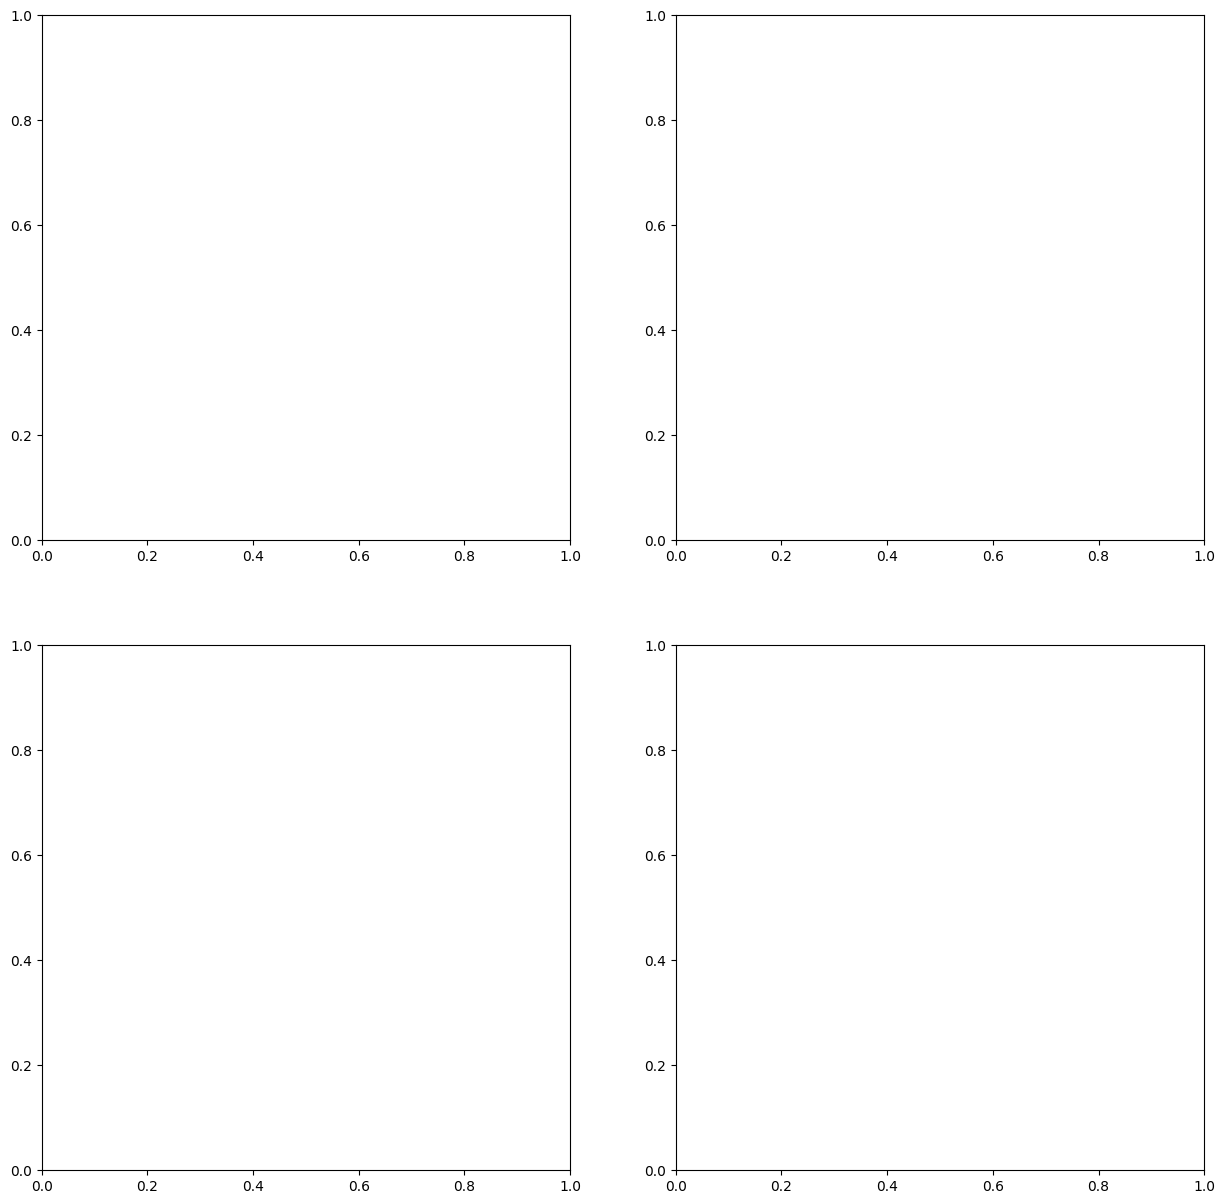

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import os # For saving the GIF

# --- ANIMATION PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data_angle_derivatives)[0]
WINDOW_SIZE = 100    # Number of time points in the sliding window
STEP_SIZE = 5        # How much the window shifts per frame (fewer steps = faster animation)
FPS = 10             # Frames per second for the final GIF

# Calculate the start indices for each frame
start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

# --- GLOBAL PLOTTING CONFIGURATION (from your code) ---
network_titles = ['C_xys Network', 'C_yxs Network', 'T_xys Network', 'T_yxs Network']
mapping = {
    0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz", 
    6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"
}
target_nodes = ["h_wx", "h_wy", "h_wz"]
width_scale = 5.0 

# Prepare the figure and axes once
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes_flat = axes.flatten()

# Pre-calculate the fixed circular layout (should not change over time)
# We use a dummy graph just to get the node ordering for the layout.
dummy_G = nx.DiGraph(np.zeros((12, 12)))
dummy_LG = nx.relabel_nodes(dummy_G, mapping)
fixed_pos = nx.circular_layout(dummy_LG)

# Define a single function to draw a network on a specific axis
def draw_single_network(ax, network_data, title, pos, t_start):
    """Draws a single network plot on the given axis."""
    
    # Clear the previous drawing
    ax.clear()
    ax.axis('off') # Keep axis off after clearing
    
    # --- Graph Creation and Relabeling ---
    G = nx.DiGraph(network_data)
    LG = nx.relabel_nodes(G, mapping)

    # --- Separate Edges for Coloring ---
    special_edgelist = []
    special2_edgelist = []
    other_edgelist = []
    special_widths = []
    special2_widths = []
    other_widths = []

    for u, v, data in LG.edges(data=True):
        weight = data.get('weight', 0)
        
        if weight > 0:
            width = weight * width_scale
            is_from_target = u in target_nodes
            is_to_target = v in target_nodes
            
            # Grouping logic (simplified)
            if is_from_target:
                special_edgelist.append((u, v))
                special_widths.append(width)
            elif is_to_target:
                special2_edgelist.append((u, v))
                special2_widths.append(width)
            else:
                other_edgelist.append((u, v))
                other_widths.append(width)

    # --- Draw the Network ---
    
    # 1. Draw Nodes and Labels
    nx.draw_networkx_nodes(LG, pos, node_size=700, node_color='lightgreen', edgecolors='black', ax=ax)
    nx.draw_networkx_labels(LG, pos, font_size=10, font_color='black', ax=ax)

    # 2. Draw Special Edges (FROM target_nodes - Red)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special_edgelist, width=special_widths, 
        edge_color='red', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 3. Draw Special2 Edges (TO target_nodes - Blue)
    nx.draw_networkx_edges(
        LG, pos, edgelist=special2_edgelist, width=special2_widths, 
        edge_color='blue', alpha=0.7, arrowsize=15, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # 4. Draw Other Edges (Gray)
    nx.draw_networkx_edges(
        LG, pos, edgelist=other_edgelist, width=other_widths, 
        edge_color='gray', alpha=0.5, arrowsize=10, 
        connectionstyle='arc3,rad=0.1', ax=ax
    )

    # Set Title and time annotation
    ax.set_title(f"{title}\nTime Window: {t_start}-{t_start + WINDOW_SIZE}", fontsize=12)

# --- 2. The Update Function for the Animation ---
def update(frame_index):
    """
    Function called by FuncAnimation for each frame.
    It calculates the networks for a new time window and updates the plots.
    """
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    
    # 1. Slice the data for the current window
    data_window = data_angle_derivatives[t_start:t_end, :]

    # 2. Calculate the four networks
    # The output is (C_xys, C_yxs, T_xys, T_yxs) as per your setup
    C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data_window, 
        (0.06, 0.06, 0.02), 
        C_threshold=0.02, 
        T_threshold=0.02, 
        n=np.shape(data_angle_derivatives)[1]
    )
    
    networks_data = [C_xys, C_yxs, T_xys, T_yxs]

    # 3. Redraw all four subplots
    for i in range(4):
        ax = axes_flat[i]
        network_data = networks_data[i]
        title = network_titles[i]
        
        draw_single_network(ax, network_data, title, fixed_pos, t_start)
    
    # Return the updated artists (necessary for FuncAnimation)
    return axes_flat

# --- 3. Run and Save the Animation ---
print(f"Generating animation with {NUM_FRAMES} frames...")

anim = FuncAnimation(
    fig, 
    update, 
    frames=NUM_FRAMES,
    blit=False,  # Set to False, as NetworkX often doesn't handle blitting well
    interval=1000/FPS # Delay between frames in ms
)

# Set the save path
animation_filename = 'network_evolution.gif'

# Save the animation as a GIF
writer = PillowWriter(fps=FPS)
anim.save(animation_filename, writer=writer)

plt.close(fig) # Close the figure to free up memory
print(f"Animation saved as {animation_filename}")

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# --- PARAMETERS ---
TOTAL_TIME_POINTS = np.shape(data_angle_derivatives)[0]
WINDOW_SIZE = 100
STEP_SIZE = 5
FPS = 10

start_indices = np.arange(0, TOTAL_TIME_POINTS - WINDOW_SIZE, STEP_SIZE)
NUM_FRAMES = len(start_indices)

mapping = {0: "h_wx", 1: "h_wy", 2: "h_wz", 3: "t_wx", 4: "t_wy", 5: "t_wz",
           6: "c_wx", 7: "c_wy", 8: "c_wz", 9: "f_wx", 10: "f_wy", 11: "f_wz"}
target_nodes = ["h_wx", "h_wy", "h_wz"]

# --- RECORD HOOP CONNECTIONS ---
C_xys_hoop_series = []
T_xys_hoop_series = []

# --- FUNCTION TO EXTRACT HOOP CONNECTION VALUES ---
def extract_hoop_connections(matrix):
    """
    Extract all rows/columns corresponding to hoop nodes (target_nodes)
    and flatten them into a single vector of values.
    """
    indices = [k for k, v in mapping.items() if v in target_nodes]
    # Take all connections from/to hoop nodes
    hoop_values = matrix[indices, :].flatten()
    hoop_values = np.append(hoop_values, matrix[:, indices].flatten())
    return hoop_values

# --- ANIMATION UPDATE FUNCTION ---
def update(frame_index):
    t_start = start_indices[frame_index]
    t_end = t_start + WINDOW_SIZE
    data_window = data_angle_derivatives[t_start:t_end, :]

    C_xys, C_yxs, T_xys, T_yxs = compute_functional_network(
        data_window, (0.06, 0.06, 0.02), C_threshold=0.02, T_threshold=0.02, n=np.shape(data_angle_derivatives)[1]
    )

    # Record hoop connection values
    C_xys_hoop_series.append(extract_hoop_connections(C_xys))
    T_xys_hoop_series.append(extract_hoop_connections(T_xys))

    # --- OPTIONAL: draw animation frames if needed ---
    return []

# --- RUN ANIMATION TO COLLECT DATA ---
for i in range(NUM_FRAMES):
    update(i)

# Convert to arrays: rows = time windows, columns = different hoop connections
C_xys_hoop_series = np.array(C_xys_hoop_series)
T_xys_hoop_series = np.array(T_xys_hoop_series)

# --- PLOT TIME SERIES ---
time_windows = start_indices
plt.figure(figsize=(12, 6))
plt.plot(time_windows, C_xys_hoop_series.mean(axis=1), label='C_xys (hoop connections)')
plt.plot(time_windows, T_xys_hoop_series.mean(axis=1), label='T_xys (hoop connections)')
plt.xlabel("Time window start index")
plt.ylabel("Average connection weight")
plt.title("Time series of C_xys and T_xys connecting to hoop nodes")
plt.legend()
plt.grid(True)
plt.show()
